# **Title:** Cross-Domain Sentiment Analysis: Evaluating Model Performance from Electronics to Cosmetics Product Reviews

## **Part 01:** EDA & Data Pre-processing


## Import Necessary Libraries

In [ ]:
# Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import random
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

## Connect to drive

In [ ]:
# Connect  to drive to load dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
# Loading electronics dataset

amazon_electronics_df = pd.read_json('/content/drive/MyDrive/Atikuzzaman/Electronics_5.json',lines=True)
amazon_electronics_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [ ]:
# Loading skincare dataset

sephora_skincare_df = pd.read_csv('/content/drive/MyDrive/Atikuzzaman/reviews_250-500.csv')
sephora_skincare_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


## Finalize dataset with required features

### For text-based sentiment classification, I only need the features that describe:

* What the customer said i.e: review
* Whether the sentiment was positive/negative (the label) which I will generate  from Rating

In [ ]:
amazon_electronics_df = amazon_electronics_df[['reviewText','overall']]
amazon_electronics_df.rename(columns={'overall': 'Rating','reviewText':'Review'},inplace=True)
amazon_electronics_df.to_csv('/content/drive/MyDrive/amazon_electronics_electronics_reviews_required_feature.csv', index=False)

In [ ]:
sephora_skincare_df = sephora_skincare_df[['rating','review_text']]
sephora_skincare_df  = sephora_skincare_df.rename(columns={'review_text':'Review','rating': 'Rating'})
sephora_skincare_df = sephora_skincare_df[['Review','Rating']]
sephora_skincare_df.to_csv('/content/drive/MyDrive/sephora_skincare_skincare_reviews_required_feature.csv', index=False)

In [ ]:
# Load modified & saved dataset from drive

amazon_electronics_df = pd.read_csv('/content/drive/MyDrive/amazon_electronics_reviews_required_feature.csv')
amazon_electronics_df.head()

,Review,Rating
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [ ]:
# Load modified & saved dataset from drive

sephora_skincare_df = pd.read_csv('/content/drive/MyDrive/sephora_skincare_reviews_required_feature.csv')
sephora_skincare_df.head()

,Review,Rating
0,Used to swear by this product but hate the sme...,2
1,I’ve only been using this for a week and my sk...,5
2,"Why, why, why would you change the formula?!!!...",1
3,I have used this product for years and it has ...,1
4,Great product for anti-aging Also great for da...,5


## Basic Checks

In [ ]:
# Check  dataset shape

print(amazon_electronics_df.shape)
print(sephora_skincare_df.shape)

(1689188, 2)
(206725, 2)


In [ ]:
# Creating subset for faster processing & training

amazon_electronics_df = amazon_electronics_df.sample(10000, random_state=42).reset_index(drop=True)
sephora_skincare_df = sephora_skincare_df.sample(5000, random_state=42).reset_index(drop=True)

In [ ]:
# Re Check  dataset shape
print(amazon_electronics_df.shape)
print(sephora_skincare_df.shape)

(10000, 2)
(5000, 2)


In [ ]:
# Checking dataset structure

print(amazon_electronics_df.info(),'\n\n')
print(sephora_skincare_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9992 non-null   object
 1   Rating  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  4994 non-null   object
 1   Rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB
None


## Creating a function for sentiment labelling

In [ ]:
def label_sentiment(rating):
    """
    Assign a sentiment label based on numerical rating.

    Parameters
    ----------
    rating : int or float, Numerical rating value (typically 1–5).

    Returns
    -------
    str
        Sentiment label:
        - "negative" if rating ≤ 2
        - "neutral" if rating = 3
        - "positive" if rating ≥ 4
    """
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

In [ ]:
# Apply the function to create sentiment labels

amazon_electronics_df['sentiment'] = amazon_electronics_df['Rating'].apply(label_sentiment)
sephora_skincare_df['sentiment'] = sephora_skincare_df['Rating'].apply(label_sentiment)

In [ ]:
# Check dataset with new column
amazon_electronics_df.head()

,Review,Rating,sentiment
0,"Well, after trying out some Box Towers....that...",5,positive
1,I ordered one for my wife and one for me. Afte...,5,positive
2,muy buen producto... a full en juegos fHD.... ...,5,positive
3,The sound quality of this unit is phenomenal. ...,5,positive
4,It is good on keeping your cpu cool also down'...,4,positive


In [ ]:
# Check dataset with new column
sephora_skincare_df.head()

,Review,Rating,sentiment
0,This is the best eye serum I have ever used an...,5,positive
1,Has helped so much with stubborn texture! Will...,5,positive
2,Honestly I did not like this product at all. I...,2,negative
3,Okay. So. I started quarantine trying to find ...,5,positive
4,so good! works wonders. redness goes away almo...,5,positive


## Checking duplicate entries availability

In [ ]:
print('amazon_electronics dataset has',amazon_electronics_df['Review'].duplicated().sum(),'duplicated entries')
print('sephora_skincare dataset has',sephora_skincare_df['Review'].duplicated().sum(),'duplicated entries')

amazon_electronics dataset has 8 duplicated entries
sephora_skincare dataset has 11 duplicated entries


## Handling duplicated entries

In [ ]:
# Drop duplicate reviews (keep first occurrence only)

amazon_electronics_df.drop_duplicates(subset=['Review'], keep='first', inplace=True)
sephora_skincare_df.drop_duplicates(subset=['Review'], keep='first', inplace=True)

# Reset index after dropping

amazon_electronics_df.reset_index(drop=True, inplace=True)
sephora_skincare_df.reset_index(drop=True, inplace=True)

In [ ]:
# Check again to confirm
print('amazon_electronics dataset has',amazon_electronics_df['Review'].duplicated().sum(),'duplicated entries now after data handling')
print('sephora_skincare dataset has',sephora_skincare_df['Review'].duplicated().sum(),'duplicated entries now after data handling')

amazon_electronics dataset has 0 duplicated entries now after data handling
sephora_skincare dataset has 0 duplicated entries now after data handling


## Checking missing value or Nan value in dataset

In [ ]:
print('Number of missing values in following column of amazon_electronics as follows: \n',amazon_electronics_df.isnull().sum(),'\n')
print('Number of missing values in following column of sephora_skincare as follows: \n',sephora_skincare_df.isnull().sum())

Number of missing values in following column of amazon_electronics as follows: 
 Review       1
Rating       0
sentiment    0
dtype: int64 

Number of missing values in following column of sephora_skincare as follows: 
 Review       1
Rating       0
sentiment    0
dtype: int64


## Handling Missing Values

In [ ]:
# Drop rows where 'Review' or 'Rating' columns are missing as one missing value

amazon_electronics_df.dropna(subset=['Review', 'Rating'], inplace=True)
sephora_skincare_df.dropna(subset=['Review', 'Rating'], inplace=True)

# Reset index after dropping

amazon_electronics_df.reset_index(drop=True, inplace=True)
sephora_skincare_df.reset_index(drop=True, inplace=True)

In [ ]:
# Re Checking any missing value or Nan value in dataset

print('Number of missing values in following column of amazon_electronics after handling as follows: \n',amazon_electronics_df.isnull().sum(),'\n')
print('Number of missing values in following column of sephora_skincare after handling as follows: \n',sephora_skincare_df.isnull().sum())

Number of missing values in following column of amazon_electronics after handling as follows: 
 Review       0
Rating       0
sentiment    0
dtype: int64 

Number of missing values in following column of sephora_skincare after handling as follows: 
 Review       0
Rating       0
sentiment    0
dtype: int64


## Exploratory  Data Analysis

### Review Length Analysis

See how long reviews are in each domain (word count helps  for tokenization and padding length).

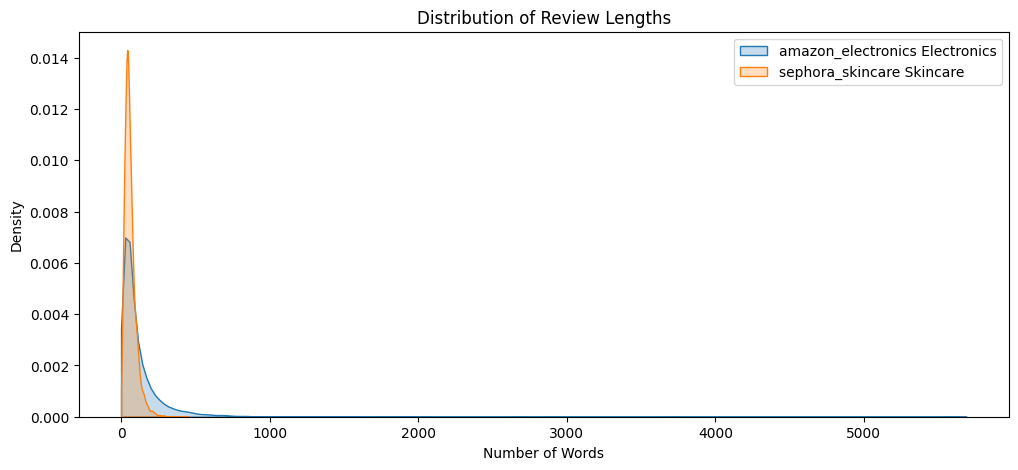

In [ ]:
# Calculate review lengths
amazon_electronics_df['review_length'] = amazon_electronics_df['Review'].apply(lambda x: len(str(x).split()))
sephora_skincare_df['review_length'] = sephora_skincare_df['Review'].apply(lambda x: len(str(x).split()))

# Plot histograms
plt.figure(figsize=(12,5))
sns.kdeplot(amazon_electronics_df['review_length'], label='amazon_electronics Electronics', shade=True,clip=(0, None))
sns.kdeplot(sephora_skincare_df['review_length'], label='sephora_skincare Skincare', shade=True,clip=(0, None))
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()

# Save figure to file
plt.savefig("review_length_distribution.png", dpi=300, bbox_inches='tight')

# Display plot
plt.show()

### Average Review Length per Sentiment

Check if positive/negative reviews differ in length.

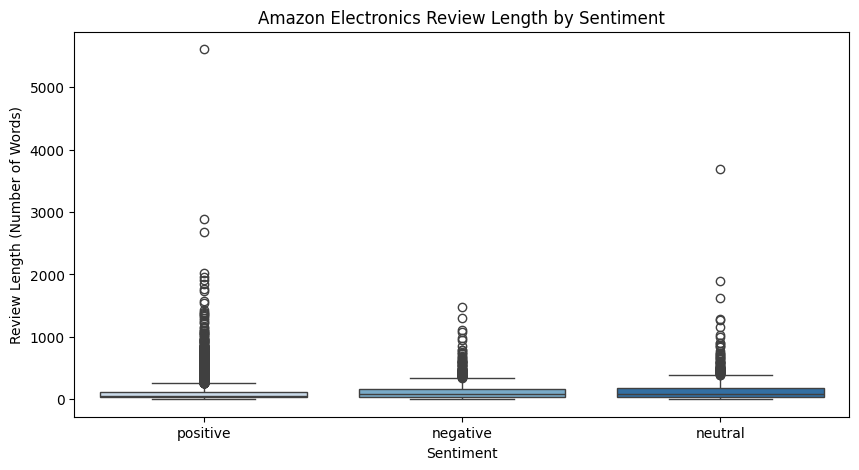

In [ ]:
# Creating Boxplot to check average review length for amazon_electronics Electronics

plt.figure(figsize=(10,5))

# Boxplot grouped by sentiment
sns.boxplot(x='sentiment',y='review_length',data=amazon_electronics_df,palette='Blues')
plt.title("Amazon Electronics Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Number of Words)")

# Save the figure
plt.savefig("amazon_electronics_review_length_boxplot.png",dpi=300, bbox_inches="tight")

# Display plot
plt.show()

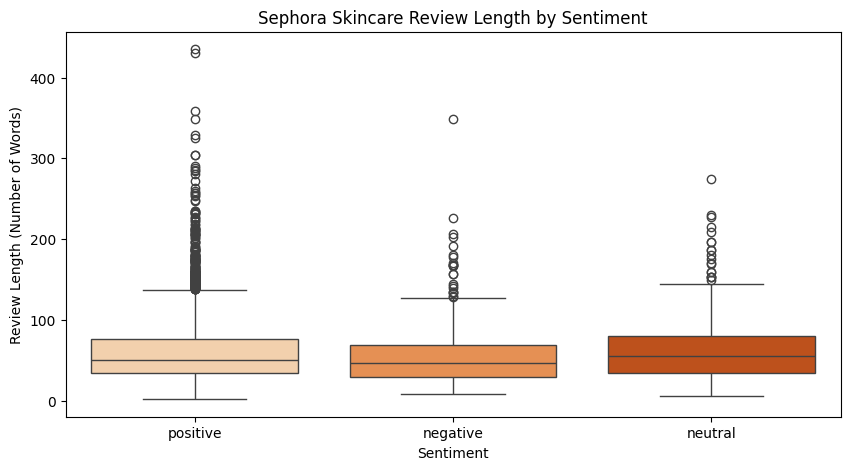

In [ ]:
# Creating Boxplot to check average review length for sephora_skincare

plt.figure(figsize=(10,5))

# Boxplot showing distribution of review lengths per sentiment category
sns.boxplot(x='sentiment',y='review_length',data=sephora_skincare_df,palette='Oranges')

# Plot title and axis labels
plt.title("Sephora Skincare Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Number of Words)")

# Save the figure
plt.savefig("sephora_skincare_review_length_boxplot.png",dpi=300, bbox_inches="tight")

# Display plot
plt.show()

## Most Frequent Words (per Sentiment)

Highlight distinct vocabularies to see technical vs. emotional differences.

In [ ]:
# Create a function for wordcloud plot

def plot_wordcloud(data, sentiment, color,dataset_name):
    """
    Generate and display a word cloud for reviews of a specific sentiment.

    Parameters
    ----------
    data : Dataset containing at least two columns: 'Review' (text) and 'sentiment'.
    sentiment : Sentiment category to filter by (e.g., "positive", "negative", "neutral").
    color : Matplotlib colormap name (e.g., "viridis", "plasma", "inferno") used to color the word cloud.

    """

    # Filter rows that match the chosen sentiment
    subset = data[data['sentiment'] == sentiment]

    # Combine all review text into one large string
    text = ' '.join(subset['Review'].astype(str))

    # Create the word cloud object
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color,       # Color scheme
        max_words=100,        # Limit for readability
        stopwords=STOPWORDS   # Removes common stopwords
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Reviews Word Cloud of {dataset_name}")
    plt.savefig(f"{sentiment}_reviews_wordcloud.png", dpi=300, bbox_inches="tight")
    plt.show()

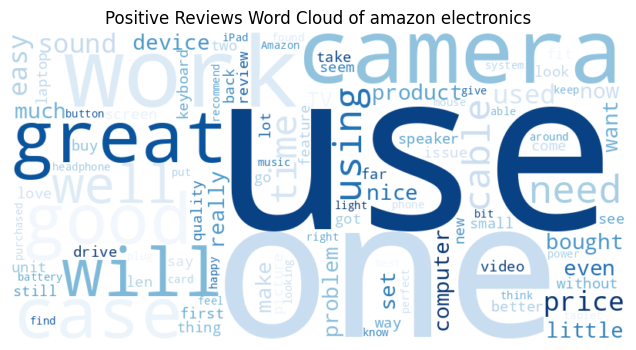

In [ ]:
# amazon_electronics Positive wordclouds

plot_wordcloud(amazon_electronics_df, 'positive', 'Blues','amazon electronics')

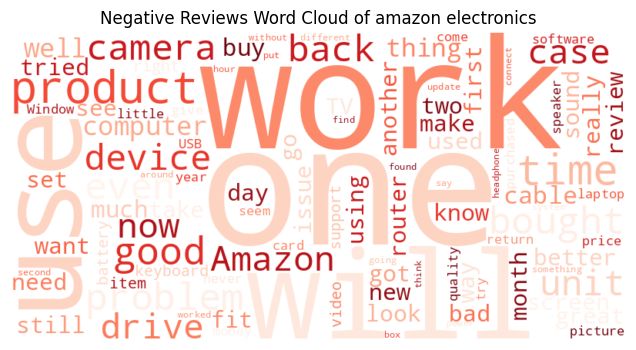

In [ ]:
# amazon_electronics Negative wordclouds

plot_wordcloud(amazon_electronics_df, 'negative', 'Reds','amazon electronics')

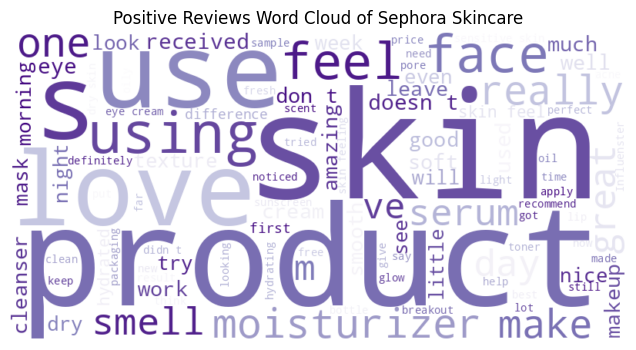

In [ ]:
# sephora_skincare positive wordclouds

plot_wordcloud(sephora_skincare_df, 'positive', 'Purples','Sephora Skincare')

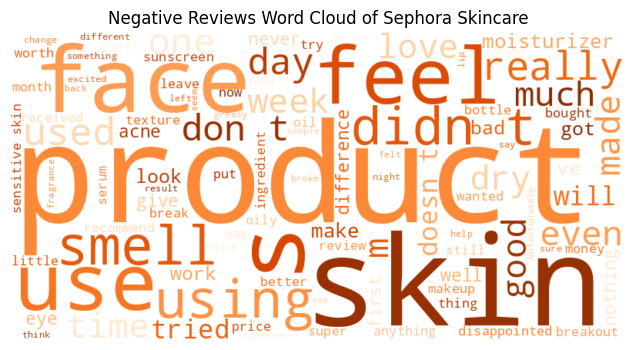

In [ ]:
# sephora_skincare negative wordclouds

plot_wordcloud(sephora_skincare_df, 'negative', 'Oranges','Sephora Skincare')

## Check Top N-Grams (Common Phrases)

See key 2–3 word combinations by sentiment.

In [ ]:
# Create a function to see top N-grams word combination

def get_top_ngrams(corpus, n=None, ngram_range=(1, 2)):
    """
    Extract the most frequent n-grams from a text corpus.

    Parameters
    ----------
    corpus : Collection of text documents (e.g., review texts).
    n : Number of top n-grams to return. If None, returns all.
    ngram_range : tuple (min_n, max_n)
        The range of n-gram sizes to consider:
        - (1, 1) for unigrams
        - (2, 2) for bigrams
        - (1, 2) for both unigrams and bigrams

    Returns
    -------
    list of tuples
        A list containing (ngram, count) sorted by frequency in descending order.
    """

    # Initialize CountVectorizer to convert text into a bag-of-words matrix
    vec = CountVectorizer(stop_words='english',ngram_range=ngram_range).fit(corpus)

    # Transform text corpus into a sparse matrix (document-term matrix)
    bag = vec.transform(corpus)

    # Sum frequency of each n-gram across all documents
    sum_words = bag.sum(axis=0)

    # Create list of (ngram, frequency)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort n-grams by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Return top n n-grams
    return words_freq[:n]


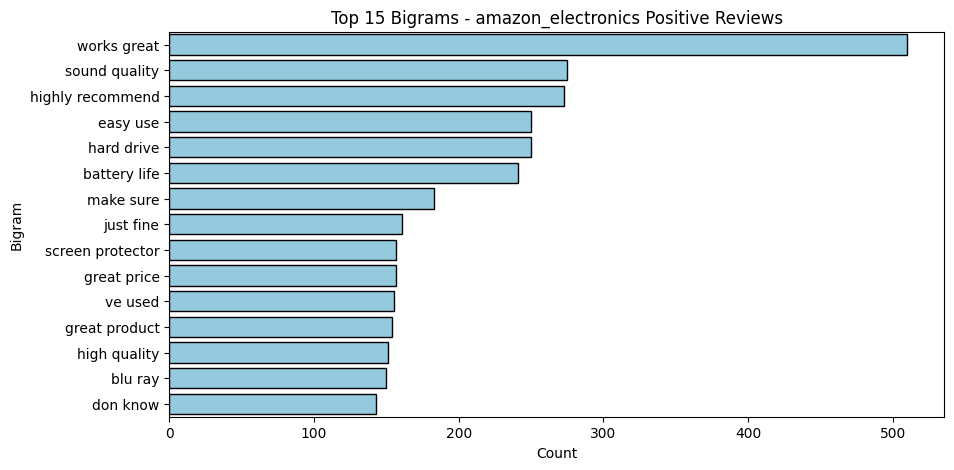

In [ ]:
# Show top bigrams for amazon_electronics positive reviews

# Extract the top 15 bigrams (2-word phrases) from positive reviews
top_bigrams_amazon_electronics = get_top_ngrams(
    amazon_electronics_df[amazon_electronics_df['sentiment'] == 'positive']['Review'],
    n=15,
    ngram_range=(2, 2)
)

# Convert the result to a DataFrame for visualization
ngrams_df_amazon_electronics = pd.DataFrame(
    top_bigrams_amazon_electronics,
    columns=['bigram', 'count']
)

# Create bar plot of the most frequent bigrams
plt.figure(figsize=(10, 5))
sns.barplot(
    x='count',
    y='bigram',
    data=ngrams_df_amazon_electronics,
    color='skyblue',
    edgecolor='black'
)

plt.title("Top 15 Bigrams - amazon_electronics Positive Reviews")
plt.xlabel("Count")
plt.ylabel("Bigram")

# Save the figure in high resolution
plt.savefig("amazon_electronics_positive_bigrams.png",
            dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

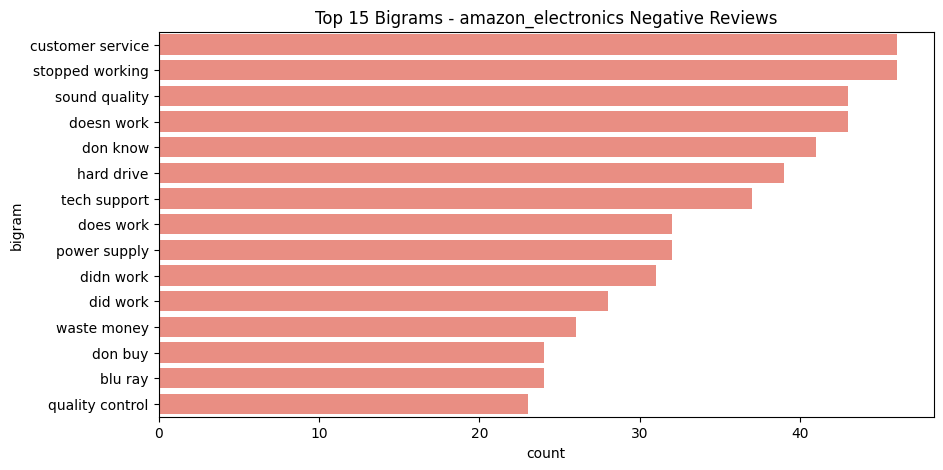

In [ ]:
# Show top bigrams for amazon_electronics negative reviews

top_bigrams_amazon_electronics = get_top_ngrams(
    amazon_electronics_df[amazon_electronics_df['sentiment'] == 'negative']['Review'],
    n=15,
    ngram_range=(2,2)
)

# Convert to DataFrame
ngrams_df_amazon_electronics = pd.DataFrame(top_bigrams_amazon_electronics, columns=['bigram', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='bigram', data=ngrams_df_amazon_electronics, color='#FA8072')
plt.title("Top 15 Bigrams - amazon_electronics Negative Reviews")
plt.xlabel("count")
plt.ylabel("bigram")

# Save the figure in high resolution
plt.savefig("amazon_electronics_negative_bigrams.png",
            dpi=300, bbox_inches="tight")
plt.show()

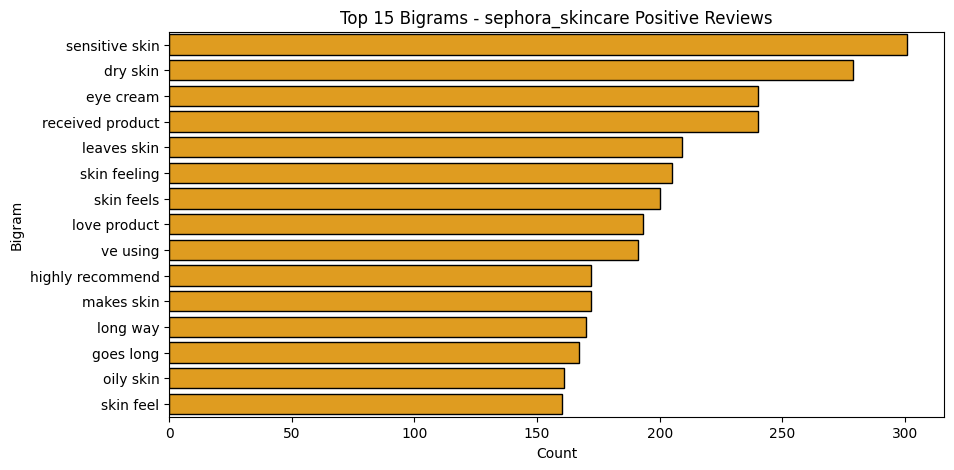

In [ ]:
# Show top bigrams for sephora_skincare positive reviews

# Extract top 15 bigrams from positive sentiment reviews
top_bigrams = get_top_ngrams(
    sephora_skincare_df[sephora_skincare_df['sentiment'] == 'positive']['Review'],
    n=15,
    ngram_range=(2, 2)
)

# Convert the list of bigrams into a DataFrame
ngrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Create bar plot visualizing most frequent positive bigrams
plt.figure(figsize=(10, 5))
sns.barplot(
    x='count',
    y='bigram',
    data=ngrams_df,
    color='orange',
    edgecolor='black'
)

plt.title("Top 15 Bigrams - sephora_skincare Positive Reviews")
plt.xlabel("Count")
plt.ylabel("Bigram")

# Save the plot (high-quality PNG)
plt.savefig("sephora_skincare_positive_bigrams.png",
            dpi=300, bbox_inches="tight")

# Display the figure
plt.show()

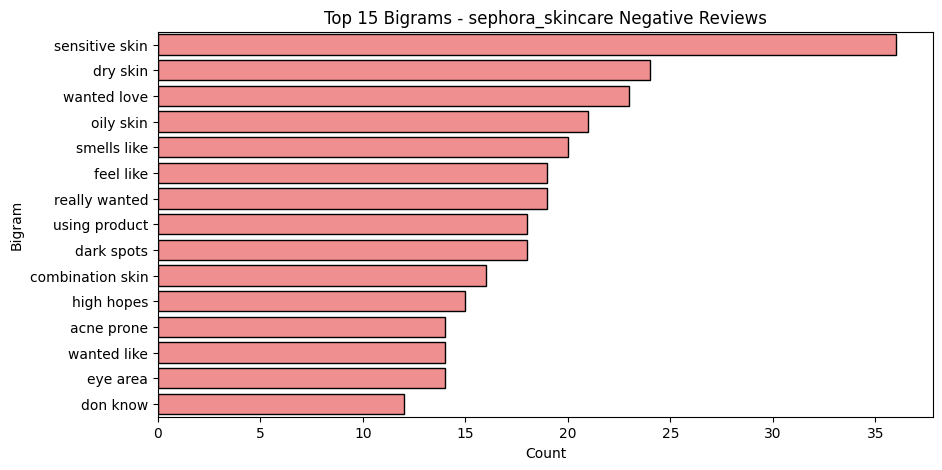

In [ ]:
# Show top bigrams for sephora_skincare negative reviews

# Extract top 15 bigrams from negative sentiment reviews
top_bigrams = get_top_ngrams(
    sephora_skincare_df[sephora_skincare_df['sentiment'] == 'negative']['Review'],
    n=15,
    ngram_range=(2, 2)
)

# Convert the bigram list into a DataFrame for visualization
ngrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Create bar plot showing most frequent bigrams in negative reviews
plt.figure(figsize=(10, 5))
sns.barplot(
    x='count',
    y='bigram',
    data=ngrams_df,
    color='#FF7F7F',        # Light red shade for negative sentiment
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 15 Bigrams - sephora_skincare Negative Reviews")
plt.xlabel("Count")
plt.ylabel("Bigram")

# Save the figure (high resolution)
plt.savefig("sephora_skincare_negative_bigrams.png",
            dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

## Sentiment Polarity


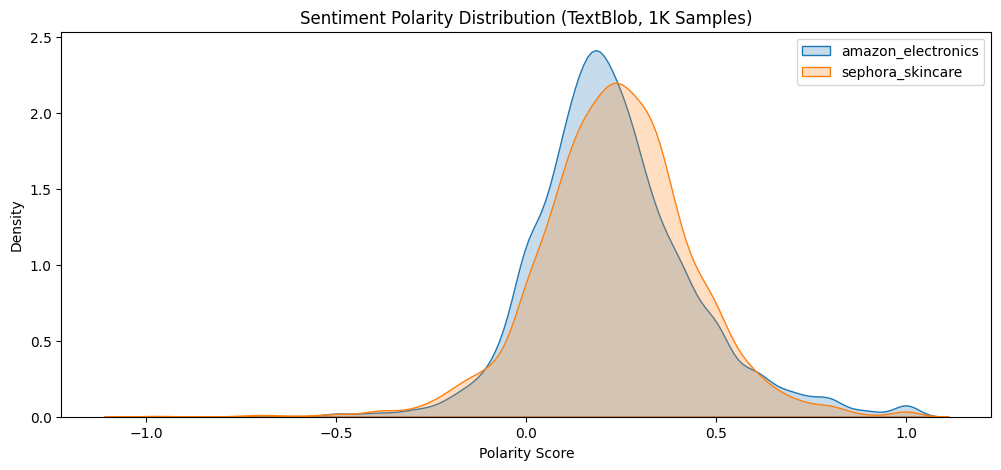

In [ ]:
# Draw small, fixed samples (1,000 rows each) to keep sentiment computation fast

amazon_electronics_sample = amazon_electronics_df.sample(1000, random_state=42)
sephora_skincare_sample = sephora_skincare_df.sample(1000, random_state=42)

# Compute TextBlob polarity scores for each review (range: -1 = negative, +1 = positive)
amazon_electronics_df['polarity'] = amazon_electronics_df['Review'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)
sephora_skincare_df['polarity'] = sephora_skincare_df['Review'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

# Plot KDE distribution of polarity values for both datasets
plt.figure(figsize=(12, 5))

sns.kdeplot(
    amazon_electronics_df['polarity'],
    label='amazon_electronics',
    shade=True
)
sns.kdeplot(
    sephora_skincare_df['polarity'],
    label='sephora_skincare',
    shade=True
)

plt.title('Sentiment Polarity Distribution (TextBlob, 1K Samples)')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.legend()

# Save figure automatically
plt.savefig("polarity_distribution_amazon_vs_sephora.png",
            dpi=300, bbox_inches="tight")

# Display the figure
plt.show()


## Vocabulary Overlap Between Domains

Helps quantify the domain shift.

In [ ]:
#  Create a function to see Vocabulary Overlap

def build_vocab(texts):
    """
    Build a vocabulary set from a collection of text documents.

    Parameters
    ----------
    texts : Collection of text entries (e.g., review texts).

    Returns
    -------
    set
        A set containing all unique lowercase words found in the input texts.
    """

    vocab = set()  # Store unique words

    for review in texts:
        # Convert to string, lowercase, split into words, and update vocabulary set
        words = str(review).lower().split()
        vocab.update(words)

    return vocab


# Build vocabulary sets from each dataset
amazon_electronics_vocab = build_vocab(amazon_electronics_df['Review'])
sephora_skincare_vocab = build_vocab(sephora_skincare_df['Review'])

# Calculate intersection (common words) and union (total unique words)
overlap = len(amazon_electronics_vocab & sephora_skincare_vocab)
total = len(amazon_electronics_vocab | sephora_skincare_vocab)

# Display vocabulary overlap percentage
print(f"Vocabulary Overlap (1K sample): {overlap}/{total} ({(overlap/total)*100:.2f}%)")

Vocabulary Overlap (1K sample): 7588/78008 (9.73%)


## Checking class distribution

In [ ]:
print(amazon_electronics_df['sentiment'].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%"),'\n')
print(sephora_skincare_df['sentiment'].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%"))

sentiment
positive    79.80%
negative    11.28%
neutral      8.92%
Name: proportion, dtype: object 

sentiment
positive    80.85%
negative    10.83%
neutral      8.32%
Name: proportion, dtype: object


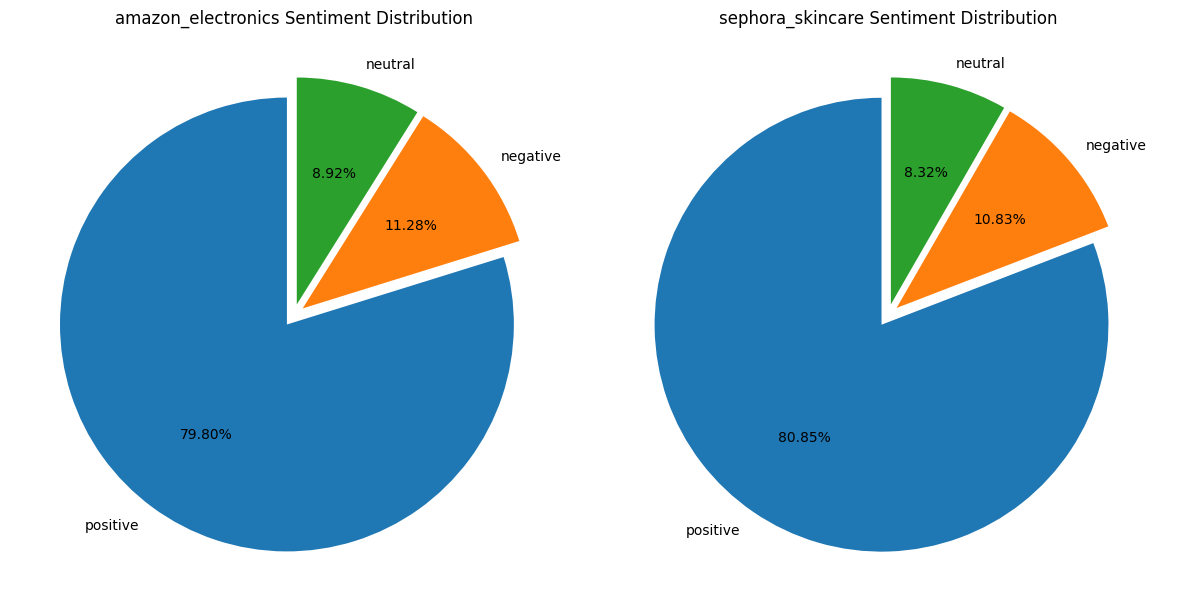

In [ ]:
# Calculate sentiment distribution (%) for each dataset
amazon_electronics_sentiment = amazon_electronics_df['sentiment'].value_counts(normalize=True) * 100
sephora_skincare_sentiment = sephora_skincare_df['sentiment'].value_counts(normalize=True) * 100

# Create side-by-side pie charts using subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# amazon_electronics Pie Chart
axes[0].pie(
    amazon_electronics_sentiment,
    labels=amazon_electronics_sentiment.index,
    autopct='%1.2f%%',           # Show percentage with 2 decimals
    startangle=90,               # Rotate pie for better alignment
    explode=[0.05] * len(amazon_electronics_sentiment)  # Slight separation of slices
)
axes[0].set_title("amazon_electronics Sentiment Distribution")

# sephora_skincare Pie Chart
axes[1].pie(
    sephora_skincare_sentiment,
    labels=sephora_skincare_sentiment.index,
    autopct='%1.2f%%',
    startangle=90,
    explode=[0.05] * len(sephora_skincare_sentiment)
)
axes[1].set_title("sephora_skincare Sentiment Distribution")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the combined figure (high resolution)
plt.savefig("sentiment_distribution_amazon_vs_sephora.png",
            dpi=300, bbox_inches="tight")

# Display the figure
plt.show()

## Data Preprocessing

### Remove HTML Tags
when data extracted text from a webpage text might contain HTML tags , so I need to remove those tag leaving plain text

In [ ]:
# Create a function to remove HTML tags from text
def remove_html_tags(text):
    """
    Remove HTML tags from a given text string.

    Parameters
    ----------
    text : str
        Text possibly containing HTML tags (e.g., <br>, <p>, <div>).

    Returns
    -------
    str
        Cleaned text with all HTML tags removed.
    """

    # Regular expression pattern matching any HTML tag
    pattern = re.compile('<.*?>')

    # Replace matched HTML tags with an empty string
    return pattern.sub('', str(text))


# Apply the cleaning function to review text columns in both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(remove_html_tags)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(remove_html_tags)


### Remove Punctuation

Punctuation refers to the symbols used in writing to separate sentences and parts of sentences, and to make their meaning clear. Examples include periods (.), commas (,), question marks (?), exclamation points (!), quotation marks ("), apostrophes ('), and more.

In text processing for tasks like sentiment analysis, punctuation is often removed because it typically doesn't contribute to the meaning or sentiment of the text and can increase the complexity of the data.

In [ ]:
# Create a function to remove punctuation using Python's built-in 're' module
def remove_punctuation(text):
    """
    Remove punctuation characters from a text string.

    Parameters
    ----------
    text : str
        Input text that may contain punctuation marks.

    Returns
    -------
    str
        Text with all punctuation removed.

    Notes
    -----
    - The regex pattern r'[^\w\s]' keeps only letters, digits, and whitespace.
    - Useful for preparing text data for NLP tasks such as tokenization or n-gram extraction.
    """

    # Replace any character that is NOT a word character or whitespace
    return re.sub(r'[^\w\s]', '', text)


# Apply punctuation removal to the review columns in both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(remove_punctuation)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(remove_punctuation)


### Convert Text to Lowercase

Converting text to lowercase is a common step in text preprocessing. It treats words like "Hello", "hello", and "HELLO" as the same word.By converting all words to lowercase, I can reduce the number of unique tokens in our vocabulary. This can make your models more efficient and less prone to overfitting.Also many text processing models are case-sensitive. Converting to lowercase helps the model to learn the relationships between words regardless of their capitalization.

In [ ]:
# Create a function to convert text to lowercase
def to_lower(text):
    """
    Convert a text string to lowercase.

    Parameters
    ----------
    text : str
        Input text that may contain uppercase characters.

    Returns
    -------
    str
        The same text converted entirely to lowercase.

    Notes
    -----
    - Lowercasing helps normalize text and reduces vocabulary size.
    - Essential for NLP tasks where 'Good' and 'good' should be treated as the same token.
    """

    return text.lower()


# Apply lowercase conversion to review columns in both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(to_lower)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(to_lower)


### Remove Stopwords
Stopwords are very common words (like "the", "a", "is", "and") that appear frequently in text but often don't carry much meaning or sentiment on their own. Removing them helps to reduce the "noise" in your data and focus on the more important words.

In [ ]:
# Download NLTK stopwords list
nltk.download('stopwords')

# Define negations to keep (important for sentiment interpretation)
negations = {'no', 'not', "don't", "didn't", "never", "cannot", "can't"}

# Create the final stopword set while preserving important negation words
stop_words = set(stopwords.words('english')) - negations


# Create a function to remove stopwords from text
def remove_stopwords(text):
    """
    Remove stopwords from a text string while keeping important negations.

    Parameters
    ----------
    text : str
        Input sentence or review text.

    Returns
    -------
    str
        Text with standard stopwords removed but negation words retained.

    Notes
    -----
    - Stopwords are common words like 'the', 'and', 'is' that usually add little meaning.
    - Negation words ('not', 'never') are intentionally kept because they change sentiment.
    - Useful in sentiment analysis and NLP preprocessing to reduce noise.
    """

    # Split the text into individual words
    words = text.split()

    # Keep only words that are not stopwords
    filtered = [word for word in words if word not in stop_words]

    # Join words back into a clean sentence
    return " ".join(filtered)


# Apply stopword removal to review columns in both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(remove_stopwords)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Remove Numbers
Number does not have any relavance with review , so I am removing number also

In [ ]:
# Create a function to remove numbers from text
def remove_numbers(text):
    """
    Remove numeric digits from a text string.

    Parameters
    ----------
    text : str
        Input text that may contain numbers.

    Returns
    -------
    str
        Text with all digit characters removed.

    Notes
    -----
    - The regex pattern r'\\d+' matches any sequence of one or more digits.
    - Useful when numbers do not contribute meaningfully to text analysis.
    """

    # Replace any numeric sequence with an empty string
    return re.sub(r'\d+', '', text)


# Apply number removal to review text columns in both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(remove_numbers)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(remove_numbers)


### Lemmatization

Lemmatization is a natural language processing technique that reduces words to their base or dictionary form, known as the "lemma." lemmatization considers the word's context and uses a vocabulary and morphological analysis to return a valid word.

For example:

- "running" becomes "run"
- "better" becomes "good"
- "are" becomes "be"

In [ ]:
# Download WordNet + OMW data (required for accurate lemmatization)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create the WordNet lemmatizer instance
le = WordNetLemmatizer()


# Create a function to apply lemmatization
def clean_text(text):
    """
    Lemmatize words in a text string after removing stopwords.

    Parameters
    ----------
    text : str
        Input text containing words to be normalized.

    Returns
    -------
    str
        Text where:
        - Stopwords are removed
        - Remaining words are lemmatized to their base form

    Notes
    -----
    - Lemmatization reduces words to meaningful base forms (e.g., 'running' → 'run').
    - Combined with stopword removal, this helps improve NLP task performance.
    - Keeps negations intact because they were excluded from the stopword list earlier.
    """

    # Split text into individual tokens
    words = text.split()

    # Remove stopwords and apply lemmatization
    filtered = [le.lemmatize(word) for word in words if word not in stop_words]

    # Return the cleaned text as a single string
    return " ".join(filtered)


# Apply the cleaning + lemmatization function to both datasets
amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(clean_text)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(clean_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Convert review to string

amazon_electronics_df['Review'] = amazon_electronics_df['Review'].astype(str)
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].astype(str)

In [ ]:
# Removes extra whitespaces between words

amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(lambda x: " ".join(x.split()))
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
# Removes non-ASCII characters to keep only standard English letters

amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii')) # This code removes emojis, accents, foreign characters, symbols. Turns all text into plain English ASCII
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
# Removes very short words (1-2 letters) which are usually not meaningful.

amazon_electronics_df['Review'] = amazon_electronics_df['Review'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 2]))
sephora_skincare_df['Review'] = sephora_skincare_df['Review'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 2]))

In [ ]:
# amazon_electronics dataset encoding

amazon_electronics_encoder = LabelEncoder()
amazon_electronics_df['label'] = amazon_electronics_encoder.fit_transform(amazon_electronics_df['sentiment'])
amazon_electronics_df.head()

,Review,Rating,sentiment,review_length,polarity,label
0,well trying box towersthat sounded like music ...,5,positive,194,0.153092,2
1,ordered one wife one reading negative review p...,5,positive,140,0.220424,2
2,muy buen producto full juegos fhd hay problema...,5,positive,24,0.350000,2
3,sound quality unit phenomenal bose sounddock w...,5,positive,93,0.268527,2
4,good keeping cpu cool also downt forget downlo...,4,positive,24,0.525000,2


In [ ]:
# sephora_skincare dataset encoding

sephora_skincare_encoder = LabelEncoder()
sephora_skincare_df['label'] = sephora_skincare_encoder.fit_transform(sephora_skincare_df['sentiment'])
sephora_skincare_df.head()

,Review,Rating,sentiment,review_length,polarity,label
0,best eye serum ever used well worth money boug...,5,positive,81,0.036944,2
1,helped much stubborn texture purchase life,5,positive,12,0.312500,2
2,honestly not like product nothing seem make br...,2,negative,20,0.100000,0
3,okay started quarantine trying find skin routi...,5,positive,113,0.236111,2
4,good work wonder redness away almost immediate...,5,positive,16,0.562500,2


## Handling Imbalance Dataset

As I will use BiLSTM & Distillbert ,  so I am  not performing any data balance technique on dataset like SMOTE . Instead I will handle imbalance dataset in model as below :
* TF-IDF + Logistic Regression: I will use class_weight='balanced' so the model gives more importance to minority classes during training.

* BiLSTM: I will apply weighted loss based on class frequencies and optionally oversampled minority classes in the training set.

* DistilBERT: I will compute class weights for CrossEntropyLoss and trained the model with weighted loss; oversampling could be applied for further balance.

In [ ]:
# Save cleaned dataset

amazon_electronics_df.to_csv('/content/drive/MyDrive/amazon_electronics_electronics_reviews_cleaned.csv', index=False)
sephora_skincare_df.to_csv('/content/drive/MyDrive/sephora_skincare_skincare_reviews_cleaned.csv', index=False)

----------------------------------------------End Of EDA & Data Preprocessing----------------------------------------------